In [47]:
from functions import *
from random import sample
from htmldate import find_date
from concurrent.futures import ThreadPoolExecutor
from bs4 import BeautifulSoup
import json
from langid.langid import LanguageIdentifier, model
import langid
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from six.moves import zip

In [6]:
data = pd.read_csv('/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/data-full-dd-full.csv')
# Open translation file
refdf = pd.read_csv("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/descriptive-full.csv")
refdf = dict(zip(refdf['image'],refdf['pretty_title']))

In [7]:
data['year'] = ''

for c,i in enumerate(data['date']):
    if i == "na" or "ERR" in str(i):
        data['year'][c] = "na"
    else:
        data['year'][c] = str(i)[0:4]
data['n'] = 1

/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
data_type_cat = data[['photo','category','n']]
data_type_cat = data_type_cat.groupby(['photo','category']).sum().reset_index()

In [15]:
data_type_cat

,photo,category,n
0,2.0,other,4
1,3.0,blog,91
2,3.0,commercial,27
3,3.0,forum,17
4,3.0,news,110
...,...,...,...
112,60.0,other,38
113,60.0,social,43
114,63.0,news,10
115,63.0,other,9


In [17]:
dfp = data_type_cat.pivot(index="photo",columns="category",values="n").reset_index().fillna(0)
freq_dict = {c:str(int(dfp[c].sum())) for c in list(dfp.columns)[1:]}

In [22]:
dfp['photo'] = [refdf[x] for x in dfp['photo']]

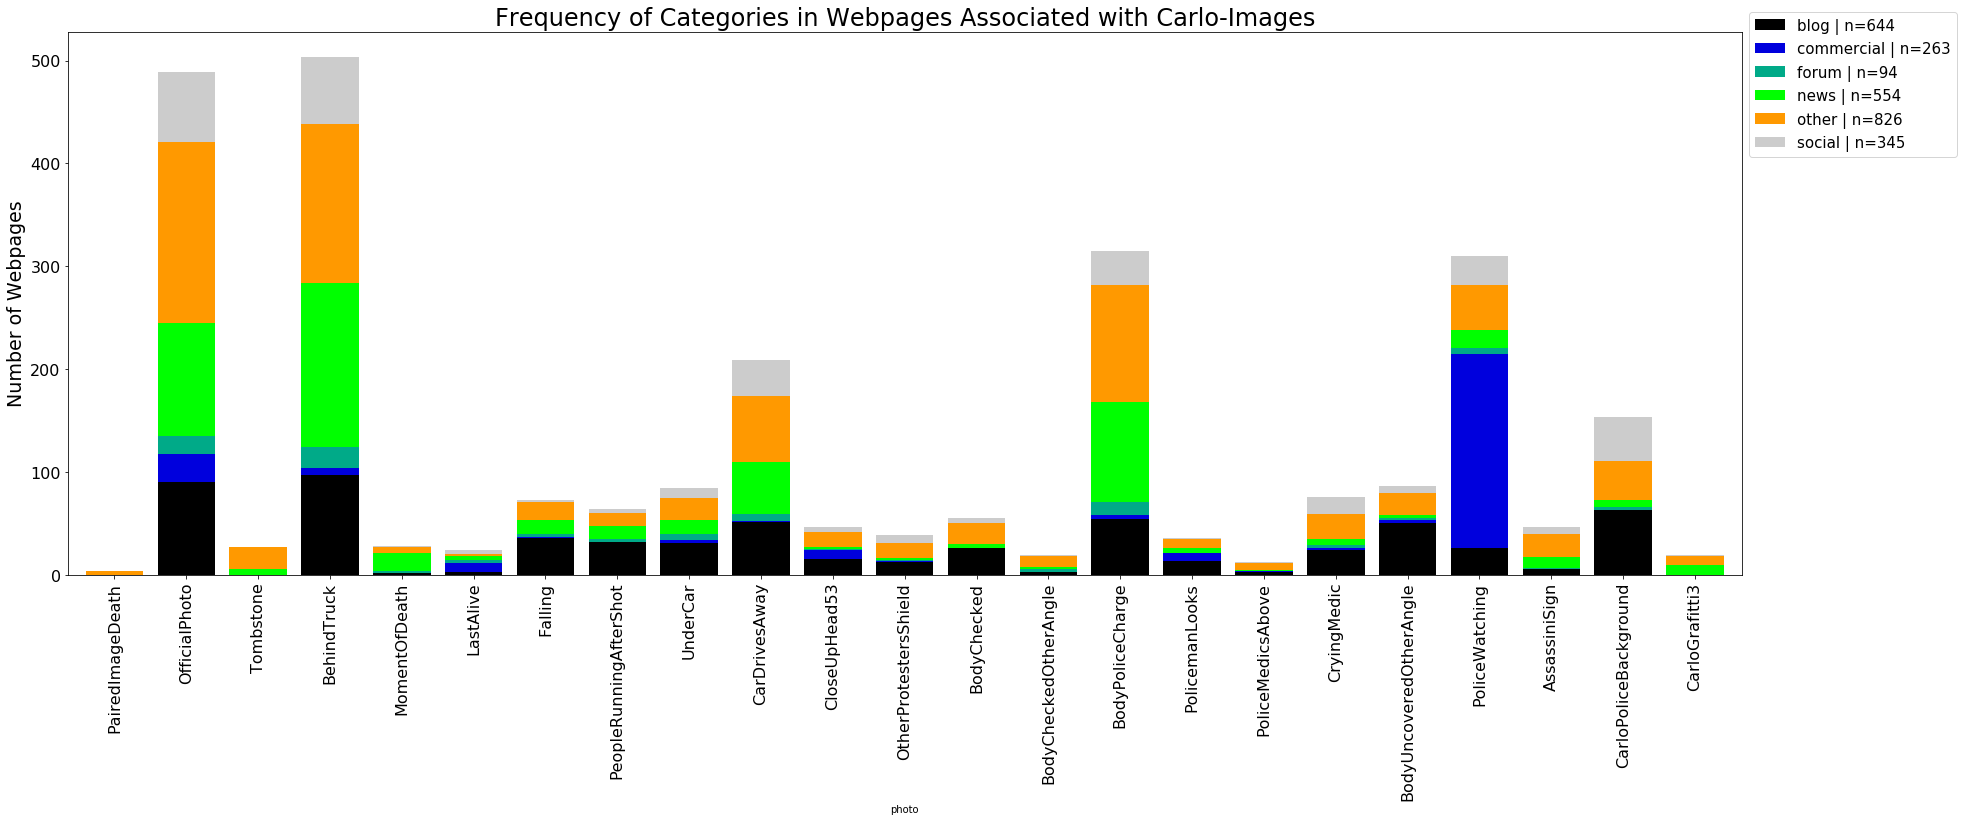

In [26]:
dfp.plot.bar(x='photo',stacked=True,figsize = (30,10),colormap='nipy_spectral',width=0.8)
plt.legend([c + " | n=" + freq_dict[c] for c in list(dfp.columns)[1:]], loc='upper left', bbox_to_anchor=(1.0, 1.05), fontsize=15)
plt.title('Frequency of Categories in Webpages Associated with Carlo-Images',size=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Webpages',fontsize=19)
plt.savefig("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/frequency-photo-category.png",dpi=300, bbox_inches='tight')
plt.show()

In [27]:
dfpp = dfp.T
dfpp = dfpp.iloc[1:,:]
#dfpp.columns = list(range(2001,2020))

for c in dfpp.columns:
    dfpp[c] = dfpp[c] / dfpp[c].sum() * 100
dfpp = dfpp.T.reset_index()

In [31]:
dfpp['index'] = dfp['photo']

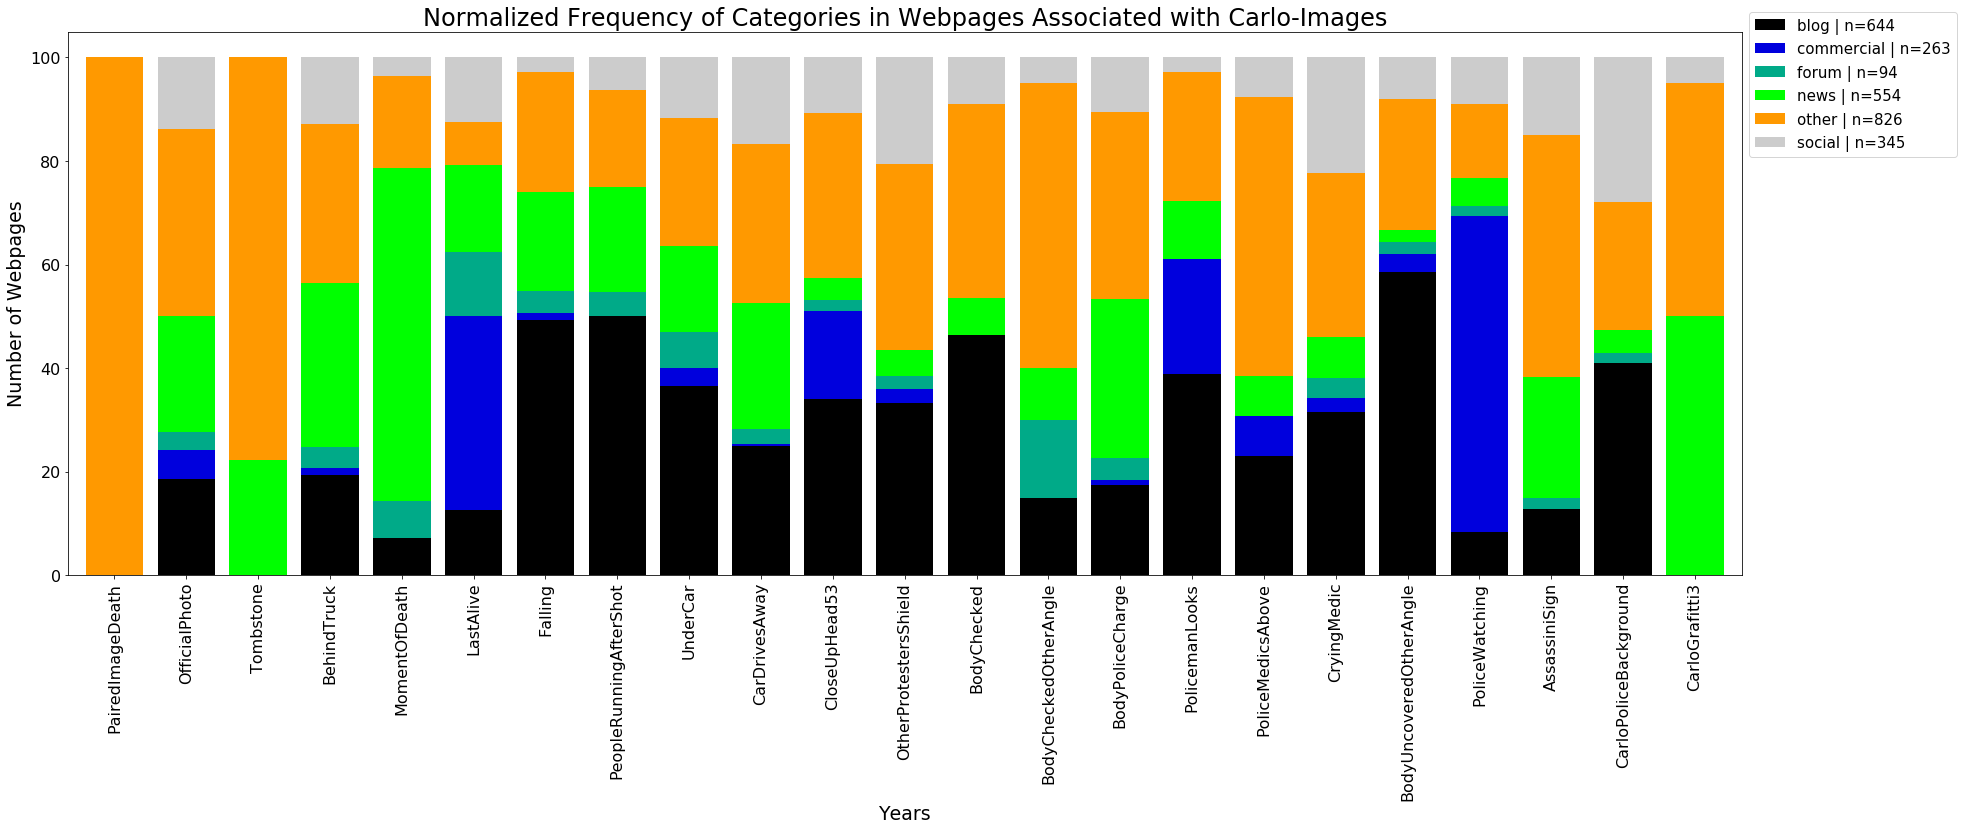

In [33]:
dfpp.plot.bar(x='index',stacked=True,figsize = (30,10),colormap='nipy_spectral',width=0.8)
plt.legend([c + " | n=" + freq_dict[c] for c in list(dfpp.columns)[1:]], loc='upper left', bbox_to_anchor=(1.0, 1.05), fontsize=15)
plt.title('Normalized Frequency of Categories in Webpages Associated with Carlo-Images',size=24)
plt.xlabel('Years',fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Webpages',fontsize=19)
plt.savefig("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/frequency-photo-category-normalized.png",dpi=300, bbox_inches='tight')


In [36]:
data_pie = data[['category','n']]
data_pie = data_pie.groupby(['category']).sum().reset_index()

In [37]:
data_pie.index = data_pie['category']
data_pie = data_pie.sort_values('n')

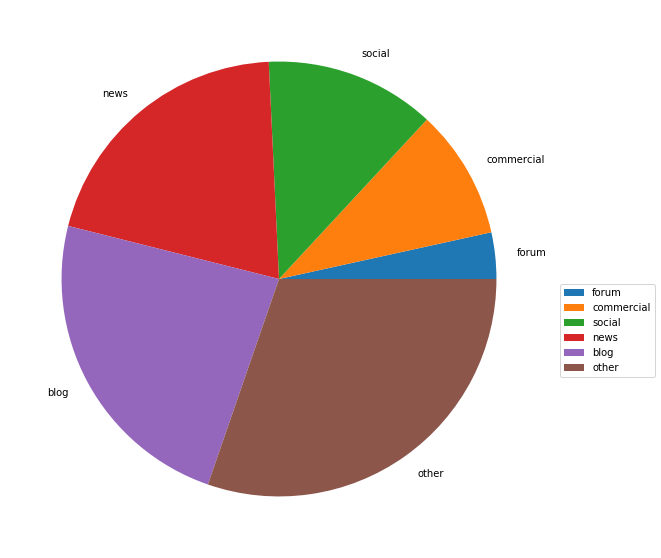

In [38]:
data_pie.plot.pie(y='n', figsize=(10, 10)).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel('',fontsize=19)
#plt.legend([c + " | n=" + freq_dict[c] for c in list(data_pie[photo])[1:]], loc='upper left', bbox_to_anchor=(1.0, 1.05), fontsize=15)
plt.savefig("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/frequency-category-total-piechart.png",dpi=300, bbox_inches='tight')


In [44]:
datadia = data[['category','year','n']].groupby(['category','year']).sum().reset_index()
datadia = datadia[~datadia['year'].isin(['1999','2000','na'])]

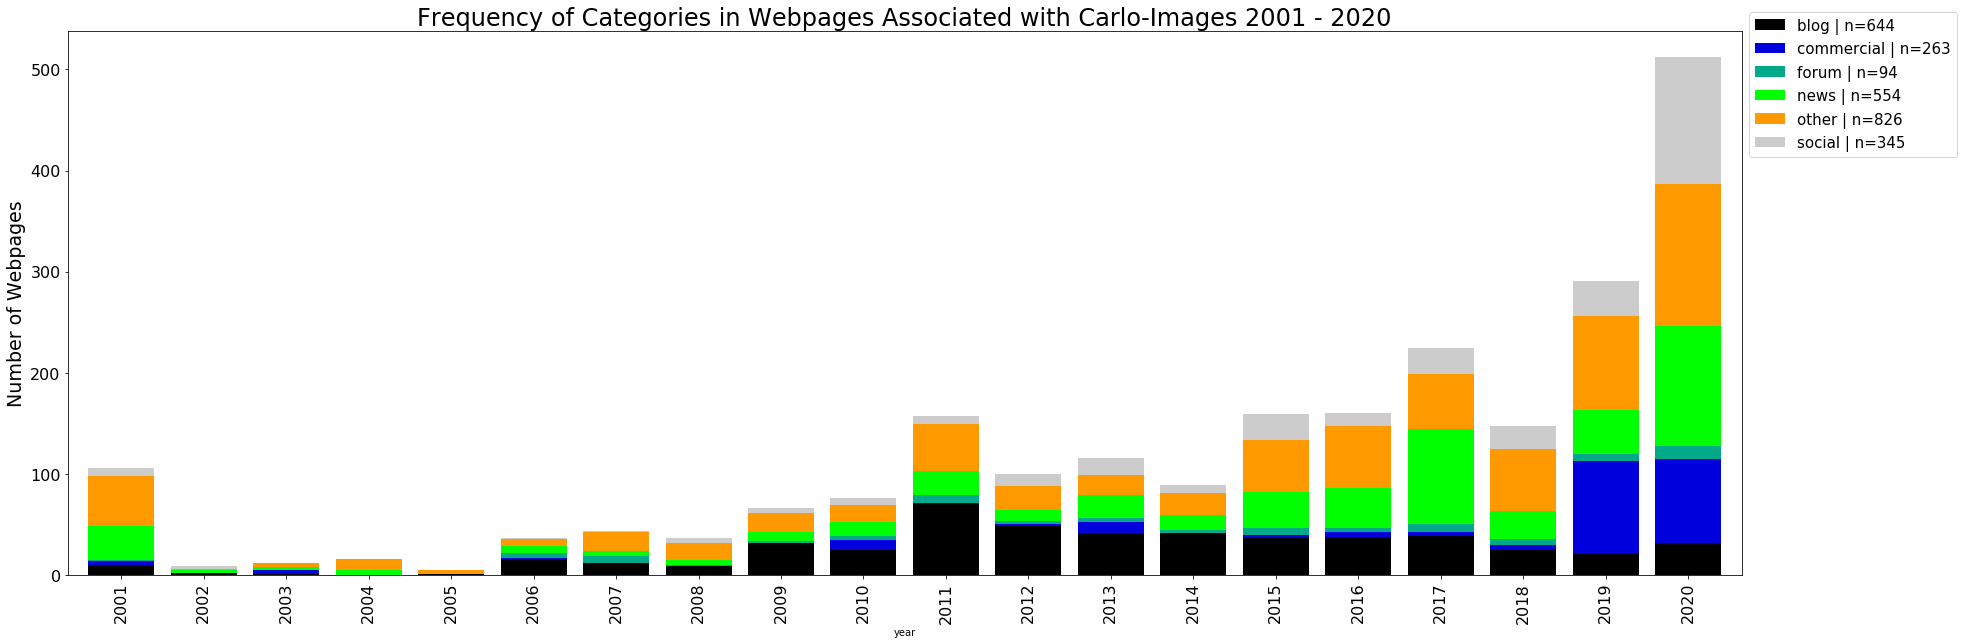

In [46]:
dfp = datadia.pivot(index="year",columns="category",values="n").reset_index().fillna(0)
dfp.plot.bar(x='year',stacked=True,figsize = (30,10),colormap='nipy_spectral',width=0.8)
plt.legend([c + " | n=" + freq_dict[c] for c in list(dfp.columns)[1:]], loc='upper left', bbox_to_anchor=(1.0, 1.05), fontsize=15)
plt.title('Frequency of Categories in Webpages Associated with Carlo-Images 2001 - 2020',size=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Webpages',fontsize=19)
plt.savefig("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/frequency-category-diachronic.png",dpi=300, bbox_inches='tight')
plt.show()